# deep face : more like a framework, can switch between different model for different tasks

In [3]:
pip install -qU deepface

In [4]:
from deepface import DeepFace

In [5]:
import pandas as pd

## checks if 2 images match, can change the model doing the matching

In [ ]:
#facial verification
result = DeepFace.verify(
    img1_path = '/content/img_1.jpg',
    img2_path= '/content/img_2.JPG'
)

25-01-18 21:52:32 - vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5
100%|██████████| 580M/580M [00:09<00:00, 60.1MB/s]


In [ ]:
result

{'verified': True,
 'distance': 0.5152984254520467,
 'threshold': 0.68,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 547,
   'y': 657,
   'w': 580,
   'h': 580,
   'left_eye': None,
   'right_eye': None},
  'img2': {'x': 298,
   'y': 329,
   'w': 539,
   'h': 539,
   'left_eye': None,
   'right_eye': None}},
 'time': 21.36}

## extract face from an image with multiple faces, RetinaFace performs well even on partial faces

In [6]:
faces = DeepFace.extract_faces(
    img_path = '/content/group.jpg',
    detector_backend='retinaface',
)


25-02-11 19:17:30 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
100%|██████████| 119M/119M [00:01<00:00, 116MB/s]


In [7]:
import matplotlib.pyplot as plt

In [12]:
face

{'face': array([[[0.05490196, 0.09803922, 0.15686275],
         [0.04313725, 0.09019608, 0.14509804],
         [0.04705882, 0.10196078, 0.15294118],
         ...,
         [0.09019608, 0.11372549, 0.1254902 ],
         [0.08235294, 0.10196078, 0.11372549],
         [0.08627451, 0.10196078, 0.10980392]],
 
        [[0.06666667, 0.09019608, 0.15686275],
         [0.05098039, 0.08627451, 0.15686275],
         [0.05098039, 0.09803922, 0.16078431],
         ...,
         [0.09803922, 0.11764706, 0.12941176],
         [0.08627451, 0.10588235, 0.11764706],
         [0.0745098 , 0.09019608, 0.09803922]],
 
        [[0.06666667, 0.09411765, 0.16078431],
         [0.0745098 , 0.10196078, 0.17254902],
         [0.0745098 , 0.11372549, 0.18431373],
         ...,
         [0.10980392, 0.12941176, 0.14509804],
         [0.10980392, 0.13333333, 0.14509804],
         [0.09411765, 0.10980392, 0.11764706]],
 
        ...,
 
        [[0.04313725, 0.04705882, 0.0627451 ],
         [0.03921569, 0.04313725,

In [31]:
for face in faces:
  #facial area ...
  # plt.imshow(face) n
  pass

## extract and compare faces to images in a folder, extraction is fine, but matching is tricky. Only ArcFace could recognize Jennifer Lawrence, no model recognized Lupita

In [9]:
#don't run , without test.jpg
recon = DeepFace.find(
    img_path = '/content/test.jpg',
    db_path = '/content/datasets/'
)

25-02-11 19:19:34 - Found 2 newly added image(s), 0 removed image(s), 0 replaced image(s).


Finding representations:   0%|          | 0/2 [00:00<?, ?it/s]

25-02-11 19:19:52 - vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5

  0%|          | 0.00/580M [00:00<?, ?B/s]
  2%|▏         | 11.0M/580M [00:00<00:06, 87.5MB/s]
  5%|▍         | 26.7M/580M [00:00<00:04, 124MB/s] 
  7%|▋         | 42.5M/580M [00:00<00:04, 114MB/s]
 10%|█         | 60.3M/580M [00:00<00:03, 135MB/s]
 13%|█▎        | 74.4M/580M [00:00<00:04, 118MB/s]
 15%|█▌        | 89.1M/580M [00:00<00:03, 126MB/s]
 18%|█▊        | 105M/580M [00:00<00:04, 118MB/s] 
 22%|██▏       | 126M/580M [00:01<00:03, 136MB/s]
 25%|██▍       | 143M/580M [00:01<00:03, 144MB/s]
 27%|██▋       | 158M/580M [00:01<00:03, 128MB/s]
 30%|██▉       | 172M/580M [00:01<00:03, 126MB/s]
 33%|███▎      | 189M/580M [00:01<00:02, 137MB/s]
 35%|███▍      | 203M/580M [00:01<00:03, 120MB/s]
 38%|███▊      | 221M/580M [00:01<00:03, 118MB/s]
 40%|████      | 235M/580M [00:01<00:02, 123MB/s]
 43%|████▎     | 248M/580M [00:01<00:02, 

25-02-11 19:20:09 - There are now 3 representations in ds_model_vggface_detector_opencv_aligned_normalization_base_expand_0.pkl
25-02-11 19:20:09 - Searching /content/test.jpg in 3 length datastore


ValueError: Confirm that /content/test.jpg exists

In [ ]:
recon[0]

,identity,hash,target_x,target_y,target_w,target_h,source_x,source_y,source_w,source_h,threshold,distance
0,/content/datasets/jennifer_lawrence.jpg,8bba043286a03423dbeb467a82374b641c5610cd,130,287,816,816,130,287,816,816,0.68,0.0


In [14]:
pip install -qU retina-face

In [15]:
from retinaface import RetinaFace

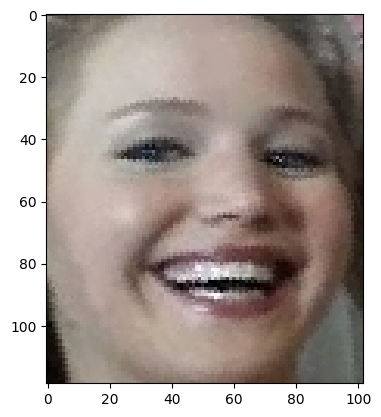

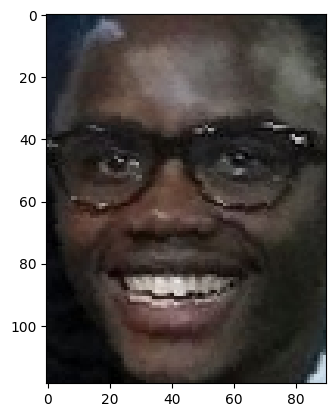

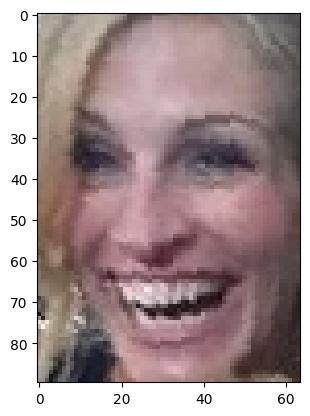

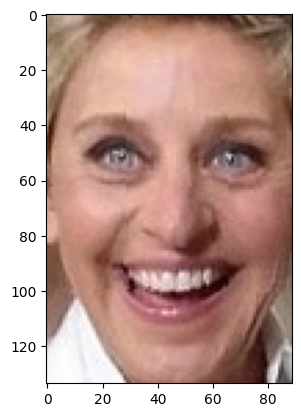

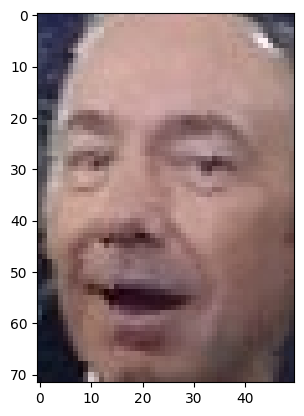

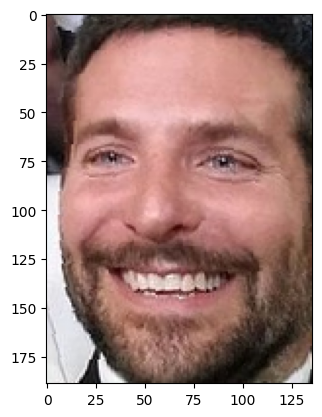

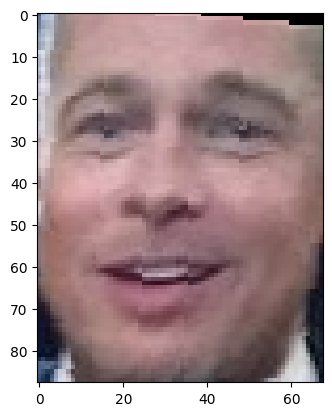

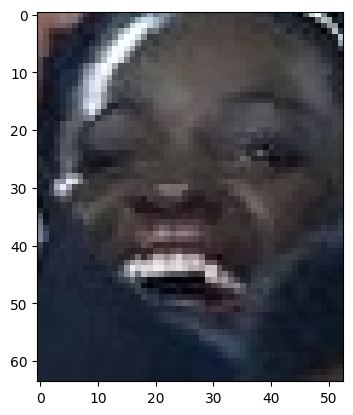

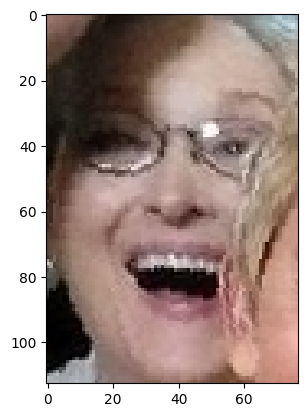

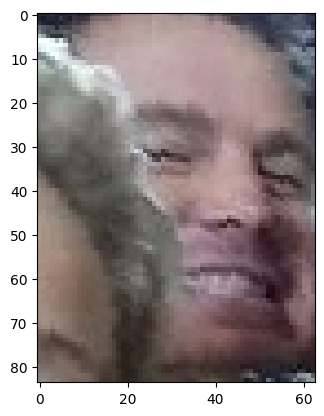

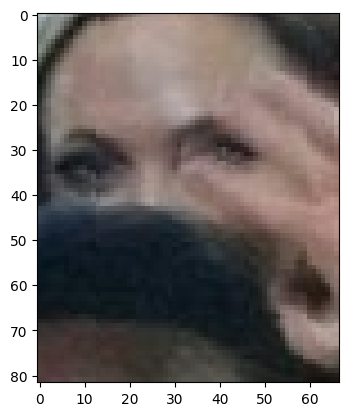

In [16]:
faces = RetinaFace.extract_faces(img_path = "group.jpg", align = True)
for face in faces:
  plt.imshow(face)
  plt.show()

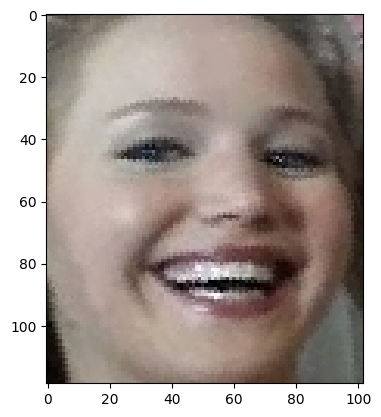

In [17]:
#create custom test.jpg from extracted face
faces = RetinaFace.extract_faces(img_path = "group.jpg", align = True)
for face in faces:
  plt.imshow(face)
  break
  # plt.show()

array([[[ 66,  65,  60],
        [ 61,  60,  55],
        [ 55,  55,  47],
        ...,
        [154, 130, 143],
        [156, 128, 143],
        [152, 119, 136]],

       [[144, 143, 138],
        [142, 142, 134],
        [110, 110, 102],
        ...,
        [148, 122, 135],
        [151, 120, 136],
        [155, 122, 139]],

       [[140, 139, 134],
        [126, 126, 118],
        [119, 119, 111],
        ...,
        [151, 130, 139],
        [153, 127, 138],
        [162, 134, 148]],

       ...,

       [[ 13,   9,   8],
        [ 13,   9,   8],
        [ 12,   7,   4],
        ...,
        [ 90,  97,  90],
        [ 88,  93,  87],
        [ 86,  91,  85]],

       [[ 13,   9,   8],
        [ 15,   9,   9],
        [ 14,   9,   5],
        ...,
        [ 86,  93,  86],
        [ 82,  89,  82],
        [ 85,  90,  84]],

       [[ 12,   8,   5],
        [ 12,   8,   5],
        [ 18,  10,   8],
        ...,
        [ 92,  99,  92],
        [ 78,  85,  78],
        [ 84,  89,  83]]], dtype=uint8)
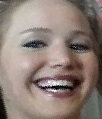

In [18]:
face

In [19]:
from PIL import Image
im = Image.fromarray(face)
im.save("test.jpeg")

In [20]:
recon = DeepFace.find(
  img_path = '/content/test.jpeg',
  db_path = '/content/datasets/',
  model_name='Facenet512',
)

25-02-11 19:28:44 - Found 2 newly added image(s), 0 removed image(s), 0 replaced image(s).


Finding representations:   0%|          | 0/2 [00:00<?, ?it/s]

25-02-11 19:28:58 - facenet512_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet512_weights.h5
To: /root/.deepface/weights/facenet512_weights.h5

  0%|          | 0.00/95.0M [00:00<?, ?B/s]
 13%|█▎        | 12.1M/95.0M [00:00<00:00, 120MB/s]
 48%|████▊     | 45.6M/95.0M [00:00<00:00, 245MB/s]
100%|██████████| 95.0M/95.0M [00:00<00:00, 227MB/s]
Finding representations: 100%|██████████| 2/2 [00:19<00:00,  9.89s/it]


25-02-11 19:29:04 - There are now 3 representations in ds_model_facenet512_detector_opencv_aligned_normalization_base_expand_0.pkl
25-02-11 19:29:04 - Searching /content/test.jpeg in 3 length datastore
25-02-11 19:29:04 - find function duration 20.241055011749268 seconds


In [21]:
recon[0]

,identity,hash,target_x,target_y,target_w,target_h,source_x,source_y,source_w,source_h,threshold,distance


In [23]:
DeepFace.verify(
    img1_path = '/content/test.jpeg',
    img2_path= '/content/datasets/jennifer_lawrence.jpg',
    model_name =  'DeepID'
)

25-02-11 19:41:29 - deepid_keras_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/deepid_keras_weights.h5
To: /root/.deepface/weights/deepid_keras_weights.h5
100%|██████████| 1.61M/1.61M [00:00<00:00, 32.1MB/s]


{'verified': False,
 'distance': 0.023568485584560928,
 'threshold': 0.015,
 'model': 'DeepID',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 0,
   'y': 0,
   'w': 101,
   'h': 113,
   'left_eye': None,
   'right_eye': None},
  'img2': {'x': 130,
   'y': 287,
   'w': 816,
   'h': 816,
   'left_eye': (689, 606),
   'right_eye': (379, 622)}},
 'time': 4.0}

## arcface test , only Jennifer Lawrence is recognized

In [39]:
import cv2

dfs = DeepFace.find(
   img_path='/content/group.jpg',
   db_path='/content/datasets/',
   model_name='ArcFace',
   detector_backend='retinaface',
   align=True,
   enforce_detection=False
)

25-02-11 20:06:53 - Searching /content/group.jpg in 2 length datastore
25-02-11 20:07:08 - find function duration 15.345831632614136 seconds


In [40]:
len(dfs)# found

11

In [41]:
for df in dfs:
   # df is a pandas dataframe
   for index, instance in df.iterrows():
      source_path = instance["identity"]
      source_img = cv2.imread(source_path)

      # extract facial area of the source image
      x = instance["target_x"]
      y = instance["target_y"]
      w = instance["target_w"]
      h = instance["target_h"]
      source_img = source_img [y:y+h, x:x+w]

In [42]:
df

,identity,hash,target_x,target_y,target_w,target_h,source_x,source_y,source_w,source_h,threshold,distance


In [43]:
dfs[6]

,identity,hash,target_x,target_y,target_w,target_h,source_x,source_y,source_w,source_h,threshold,distance


In [44]:
dfs

[Empty DataFrame
 Columns: [identity, hash, target_x, target_y, target_w, target_h, source_x, source_y, source_w, source_h, threshold, distance]
 Index: [],
 Empty DataFrame
 Columns: [identity, hash, target_x, target_y, target_w, target_h, source_x, source_y, source_w, source_h, threshold, distance]
 Index: [],
                                   identity  \
 0  /content/datasets/jennifer_lawrence.jpg   
 
                                        hash  target_x  target_y  target_w  \
 0  38c0d17f44c3b0539f7c59c6ba2d31c863ef873d       244       209       669   
 
    target_h  source_x  source_y  source_w  source_h  threshold  distance  
 0       934        31        53       102       116       0.68  0.304698  ,
 Empty DataFrame
 Columns: [identity, hash, target_x, target_y, target_w, target_h, source_x, source_y, source_w, source_h, threshold, distance]
 Index: [],
 Empty DataFrame
 Columns: [identity, hash, target_x, target_y, target_w, target_h, source_x, source_y, source_w, source_h